In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

In [4]:
# Load data
df = pd.read_csv("combined_data_with_murcko_scaffolds.csv")
df["Murcko Scaffold"]

0        c1ccc(-c2nc3cc(-c4ccc5[nH]c(-c6ccc(OCC7CCCN7)c...
1                           c1ccc2c(c1)[nH]c1cc3ccncc3cc12
2               c1cc2cc3[nH]c4ccc(OCCCN5CCNCC5)cc4c3cc2cn1
3        O=C(Nc1ccc2[nH]c(-c3ccccc3)nc2c1)c1ccc2[nH]c(-...
4           c1ccc2[nH]c(-c3ccc(-c4nc5ccccc5[nH]4)cc3)nc2c1
                               ...                        
21648                      O=c1c2ccccc2oc2cc(N3CCCC3)ccc12
21649     O=C(Nc1cccc(-c2cc3ncc(-c4ccccc4)cn3n2)c1)N1CCCC1
21650      O=C(Nc1cccc(-c2ccn3c(N4CCOCC4)cnc3n2)c1)N1CCCC1
21651     O=C(Nc1cccc(-c2ccn3c(-c4ccccc4)cnc3n2)c1)N1CCCC1
21652                O=C(Nc1cccc(-c2ccn3ccnc3n2)c1)N1CCCC1
Name: Murcko Scaffold, Length: 21653, dtype: object

In [3]:
df_chi = pd.read_csv("combined_data_with_murcko_scaffolds_chiral_specific.csv")
df_chi["Murcko Scaffold"]

0        c1ccc(-c2nc3cc(-c4ccc5[nH]c(-c6ccc(OC[C@@H]7CC...
1                           c1ccc2c(c1)[nH]c1cc3ccncc3cc12
2               c1cc2cc3[nH]c4ccc(OCCCN5CCNCC5)cc4c3cc2cn1
3        O=C(Nc1ccc2[nH]c(-c3ccccc3)nc2c1)c1ccc2[nH]c(-...
4           c1ccc2[nH]c(-c3ccc(-c4nc5ccccc5[nH]4)cc3)nc2c1
                               ...                        
21648                      O=c1c2ccccc2oc2cc(N3CCCC3)ccc12
21649     O=C(Nc1cccc(-c2cc3ncc(-c4ccccc4)cn3n2)c1)N1CCCC1
21650      O=C(Nc1cccc(-c2ccn3c(N4CCOCC4)cnc3n2)c1)N1CCCC1
21651     O=C(Nc1cccc(-c2ccn3c(-c4ccccc4)cnc3n2)c1)N1CCCC1
21652                O=C(Nc1cccc(-c2ccn3ccnc3n2)c1)N1CCCC1
Name: Murcko Scaffold, Length: 21653, dtype: object

In [ ]:
# View only the Expansion dataset
expansion = df["Molecule Name"].str[:2] == "E-"
df = df.loc[expansion]

In [39]:
df.shape

(5326, 13)

There are 5326 datapoints in the Expansion dataset. There are 2350 unique scaffolds. The most frequent scaffold occurs 118 times. 1482 of these scaffolds only occur once. 

## Calculate unique scaffolds and visualize their distribution

There are 10510 unique scaffolds without taking into account chirality. There are 10898 unique scaffolds WITH chirality.

In [34]:
unique_scaffolds = df["Murcko Scaffold"].unique()
print(len(unique_scaffolds))

2350


In [4]:
unique_scaffolds = df_chi["Murcko Scaffold"].unique()
print(len(unique_scaffolds))

10898


In [5]:
# Plot the distribution of scaffolds
scaffold_counts = df_chi['Murcko Scaffold'].value_counts()

In [36]:
scaffold_counts.iloc[0:100]

Murcko Scaffold
c1cc2ccc(-c3ccc(OCCN4CCCCC4)cc3)cc2cn1                118
c1ccc(-c2ccc3ccncc3c2)cc1                              92
O=c1[nH]ccc2c1[nH]c1cc(OCCN3CCCCC3)ccc12               66
c1ccc2c(c1)[nH]c1cc3ccncc3cc12                         65
O=C(NC1CCN(c2ccncc2)CC1)c1cc2cc(-c3nncs3)cnc2[nH]1     55
                                                     ... 
c1cc(-c2ccc(OCCN3CCCCC3)cc2)c2cc[nH]c2n1                7
O=C(c1n[nH]c2ccccc12)N1CCC(Nc2ccccc2)CC1                7
O=C(NCc1ccccc1)Nc1ccc2nnsc2c1                           7
O=c1[nH]ccc2c1[nH]c1cc(OCCN3CCOCC3)ccc12                7
O=c1c2[nH]c3ccccc3c2ncn1CC1CCNC1                        7
Name: count, Length: 100, dtype: int64

<Axes: xlabel='Murcko Scaffold'>

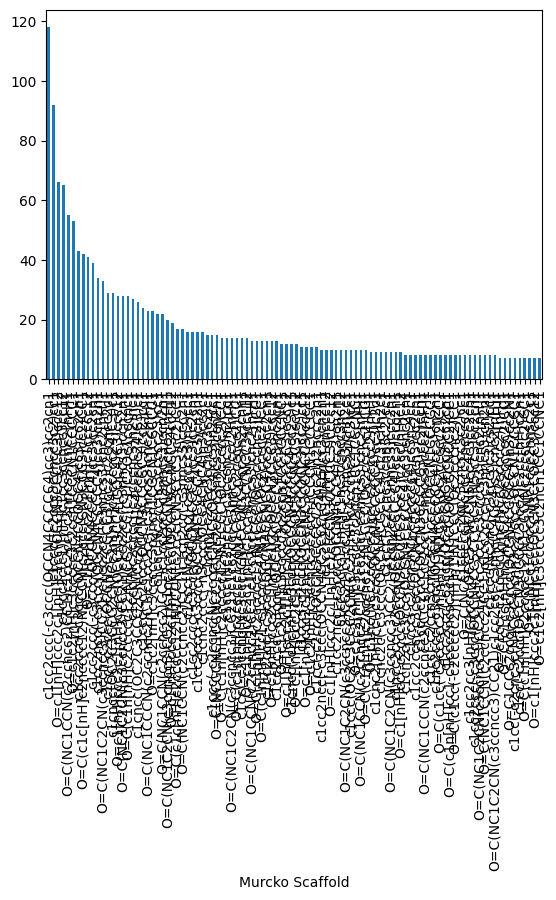

In [37]:
scaffold_counts.iloc[0:100].plot.bar()

In [6]:
print(f"Exactly {sum(scaffold_counts.iloc[i] == 1 for i in range(scaffold_counts.shape[0]))} of the scaffolds appear once in the dataset.")

Exactly 7889 of the scaffolds appear once in the dataset.


There are a total of 10510 unique scaffolds in this dataset containing 21653 total molecules. 7354 of those scaffolds only appear once.

In [18]:
scaffold_counts = pd.DataFrame(scaffold_counts)

In [20]:
scaffold_counts.to_csv("unique_scaffolds.csv")